# 16 The BART model of risk taking

* 인지모델링 / 파트 3 - 베이지안 인지모델링 [1]
* 김무성

# Contents

* 16.1 The BART model
* 16.2 A hierarchical extension of the BART model

#### 참고
* [4] Balloon Analog Risk Task (BART)- Joggle Research for iPad - https://www.youtube.com/watch?v=foy3ZVokjFM
* [5] Balloon Analog Risk Task (BART) online demo - http://timo.gnambs.at/de/scripts/bart

<img src="figures/cap16.1.png" width=600 />

* In the original version of the BART, the probability of the balloon bursting increased with every pump, but we consider a simplified version in which that probability is constant, and the expected gain of every decision to pump is zero.
* In the standard behavioral analysis of the BART, the risk propensity for a subject is measured as the average number of pumps for those balloons that did not burst.
* It is also possible to measure risk propensity using cognitive models of people’s decisions on the BART

# 16.1 The BART model 

* We focus on a simple model using just two parameters, used by van Ravenzwaaij et al. (2011). 
    - γ+ 
        - controls risk taking 
    - β
        - controls behavioral consistency. 
* p
    - It is assumed the subject knows the constant probability p that the balloon will burst any time it is pumped.
* ω
    - The number of pumps the subject considers optimal, ω, 
        - depends on this probability, 
        - and on the propensity for risk taking, such that 
            - ω = −γ+/ log (1 − p). 
* Larger values of γ+ lead to larger numbers of pumps being considered optimal, and so to greater risk seeking.
* θ_jk 
    - kth opportunity within
    - jth trial
    - The probability that a subject chooses to pump on the kth opportunity within the jth trial 
        - depends on the number of pumps considered optimal, 
        - and on the behavioral consistency of the subject.
    - These two factors are combined using the logistic function 
        - θ_jk = 1/ (1 + exp {β (k − ω)}).
* β
    - High values of β correspond to less variable responding.
    - When β = 0, θjk = 0.5, and both pumping and cashing in choices are always equally likely.
    - As β becomes large, the choice becomes completely determined by whether or not k exceeds the number of pumps the subject considers optimal. 
* d_jk
    - Finally, the observed decision made on the kth choice within the jth trial 􏰁􏰂simply follows the modeled choice, so that d_jk ∼ Bernoulli(θ_jk) .

<img src="figures/cap16.2.png" width=600 />

The code BART 1.m or BART 1.R applies the model to data from a single subject, known as George, provided in the file GeorgeSober.txt. (우리 실습에서는 Jags 코드를 씀)

In [1]:
# 이 부분은 파이썬 커널로 변경해서 실행할 것
!head GeorgeSober.txt

### JAGS code

#### BART 1.txt

In [15]:
# BART Model of Risky Decision-Making
BART_1_s = "
model{
  # Optimal Number of Pumps
  omega <- -gplus/log(1-p)
  # Choice Data
  for (j in 1:ntrials){
    for (k in 1:options[j]){
      theta[j,k] <- 1-(1/(1+max(-15,min(15,exp(beta*(k-omega))))))
      d[j,k] ~ dbern(theta[j,k])
    }
  }
  # Priors
  gplus ~ dunif(0,10)
  beta ~ dunif(0,10)
}
"

#### BART_1_jags.R

In [2]:
library(R2jags)

Loading required package: rjags
Loading required package: coda
Linked to JAGS 3.4.0
Loaded modules: basemod,bugs

Attaching package: ‘R2jags’

The following object is masked from ‘package:coda’:

    traceplot



In [4]:
p       <- .15	# (Belief of) bursting probability
ntrials <- 90 # Number of trials for the BART

In [5]:
Data   <- matrix (data = as.numeric (as.matrix (read.table ("GeorgeSober.txt"))[-1,]), ntrials, 8)
head(Data)

[,1] [,2]   [,3] [,4] [,5] [,6] [,7] [,8]
[1,]    1    2 0.1765   15    1    2 0.00 0.00
[2,]    1    2 0.1765   15    2    1 0.00 0.00
[3,]    1    2 0.1765   15    3    3 0.69 0.69
[4,]    1    2 0.1765   15    4    3 0.69 1.38
[5,]    1    2 0.1765   15    5    1 0.00 1.38
[6,]    1    2 0.1765   15    6    1 0.50 1.88

In [8]:
d      <- matrix (, ntrials, 30) # Data in binary format
head(d)

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA    NA
[2,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA    NA
[3,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA    NA
[4,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA    NA
[5,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA    NA
[6,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA    NA
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[2,]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[3,]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[4,]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[5,]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[6,]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
     [,27] [,28] [,29] [,30]
[1,]    NA    NA    NA    NA
[2,]    NA    NA    NA    NA
[3,]    NA    NA    NA    NA
[4,]    NA    NA    NA    NA
[5,]    NA    NA    NA    NA
[6,]    NA    NA    NA    NA

In [9]:
cash    <-(Data[,7]!=0)*1	# Cash or burst?
npumps  <- Data[,6]				# Nr. of pumps
options <- cash + npumps  # Nr. of decision possibilities

In [10]:
for (j in 1:ntrials)
{
	if (npumps[j]>0) {d[j, 1:npumps[j]] <- rep (0, npumps[j])}
	if (cash[j]==1) {d[j, (npumps[j]+1)] <- 1}
}

In [11]:
data <- list("ntrials", "p", "options", "d") # to be passed on to JAGS

In [12]:
myinits <-	list(
  list(gplus = 1.2, beta = 0.5))

In [13]:
# parameters to be monitored:
parameters <- c("gplus", "beta")

In [16]:
# The following command calls JAGS with specific options.
# For a detailed description see the R2jags documentation.
samples <- jags(data, inits=myinits, parameters, 
                textConnection(BART_1_s), #model.file = "BART_1.txt",
                n.chains=1, n.iter=5000, n.burnin=2000, n.thin=1)

module glm loaded


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 458

Initializing model



In [17]:
# Now the values for the monitored parameters are in the "samples" object, 
# ready for inspection.

gplus <- samples$BUGSoutput$sims.list$gplus
beta  <- samples$BUGSoutput$sims.list$beta

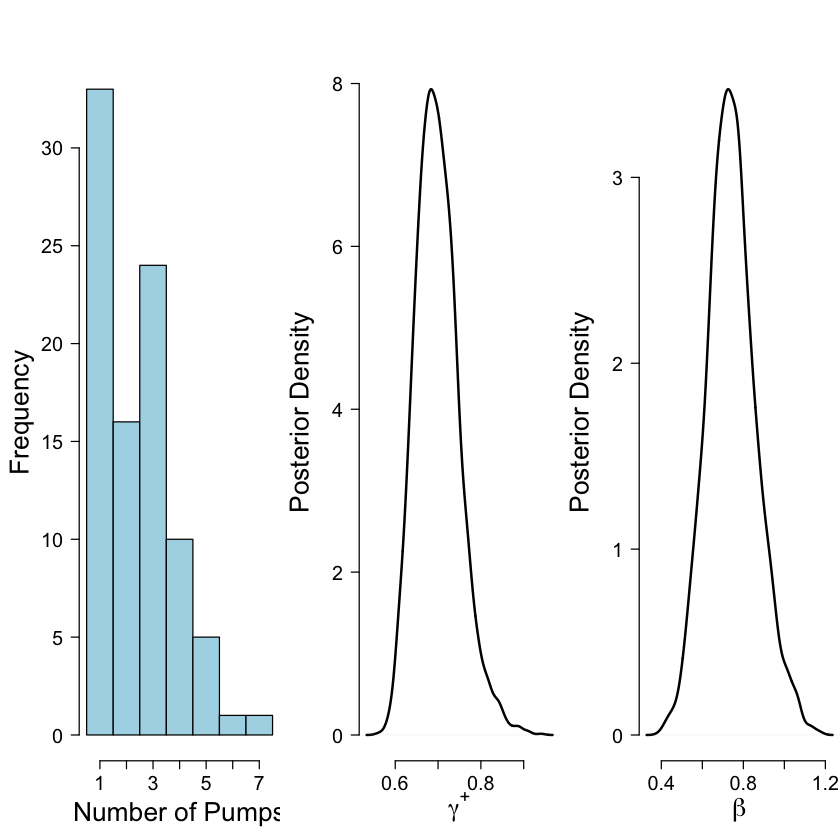

In [18]:
#################### PLOT RESULTS

par (cex.main = 2.5, cex.lab = 2, cex.axis = 1.5, mar = c(5, 5, 4, 0), las = 1)
layout (matrix (1:3, 1, 3))

hist(npumps, main = " ", xlab="Number of Pumps", ylab="Frequency", breaks=c(0:7), 
     col="lightblue", axes=F)
axis(2)
axis(1, at=seq(.5,6.5,by=1), labels = c("1", "2", "3", "4", "5", "6", "7"))
     
plot(density(gplus), xlab = expression (gamma^'+'),
	main = " ", bty = 'n', lwd=2, ylab="Posterior Density")
plot(density(beta), xlab = expression (beta),
	main = " ", bty = 'n', lwd=2, lab = c(5,3,5), ylab="Posterior Density")

<img src="figures/cap16.3.png" width=600 />

### Stan code

#### BART_1_Stan.R

Loading required package: Rcpp
Loading required package: inline

Attaching package: ‘inline’

The following object is masked from ‘package:Rcpp’:

    registerPlugin

rstan (Version 2.6.0, packaged: 2015-02-06 21:02:34 UTC, GitRev: 198082f07a60)

Attaching package: ‘rstan’

The following object is masked from ‘package:R2jags’:

    traceplot

The following object is masked from ‘package:coda’:

    traceplot




TRANSLATING MODEL 'model' FROM Stan CODE TO C++ CODE NOW.
COMPILING THE C++ CODE FOR MODEL 'model' NOW.
In file included from file2be70d2a06.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/model/model_header.hpp:17:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/agrad/rev.hpp:5:
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/agrad/rev/chainable.hpp:87:17: warning: 'static' function 'set_zero_all_adjoints' declared in header file should be declared 'static inline' [-Wunneeded-internal-declaration]
    static void set_zero_all_adjoints() {
                ^
In file included from file2be70d2a06.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/model/model_header.hpp:21:
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/in

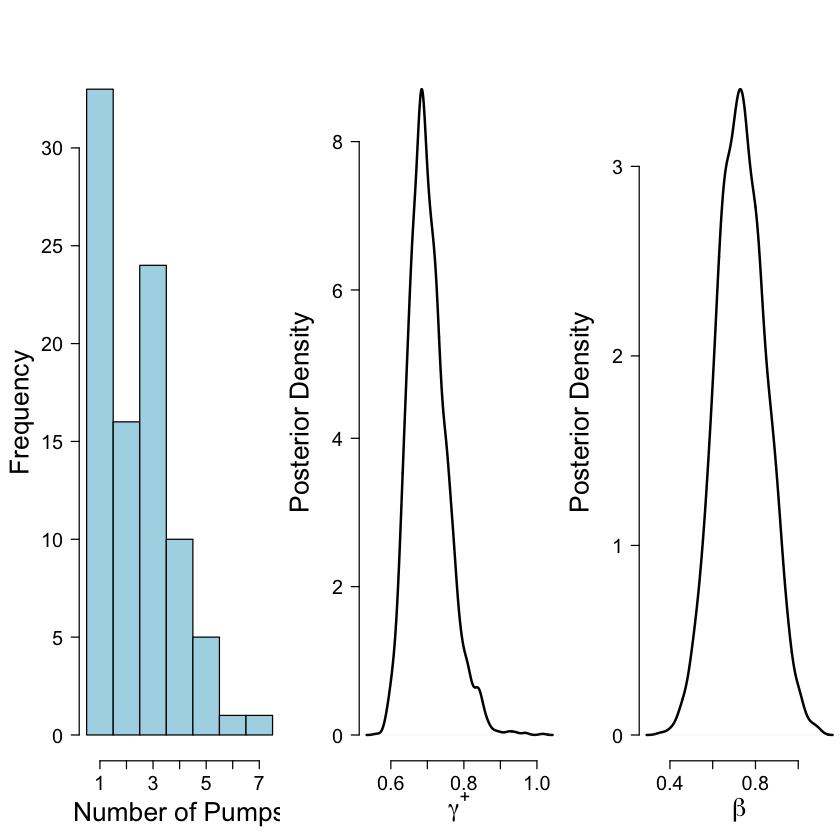

In [19]:
library(rstan)

model <- "
// BART Model of Risky Decision-Making
data { 
  int<lower=1> ntrials;
  real<lower=0,upper=1> p;
  int<lower=1> options[ntrials];
  int d[ntrials,30];
}
parameters {
  // Priors
  real<lower=0,upper=10> gplus;
  real<lower=0,upper=10> beta;
} 
transformed parameters {
  real<lower=0> omega;

  // Optimal Number of Pumps
  omega <- -gplus / log1m(p);  // log1m(p) equals log(1 - p), but faster
}
model {
  // Choice Data
  for (j in 1:ntrials) {
    for (k in 1:options[j]) {
      real theta;
      theta <- 1 - inv_logit(-beta * (k - omega));
      d[j,k] ~ bernoulli(theta);
    }
  }
}"

p       <- .15	# (Belief of) bursting probability
ntrials <- 90   # Number of trials for the BART

Data   <- matrix(data=as.numeric(as.matrix(read.table("GeorgeSober.txt"))[-1, ]),
                 ntrials, 8)
d      <- matrix(-99, ntrials, 30) # Data in binary format

cash    <-(Data[, 7] != 0) * 1  # Cash or burst?
npumps  <- Data[, 6]				    # Nr. of pumps
options <- cash + npumps        # Nr. of decision possibilities

for (j in 1:ntrials) {
	if (npumps[j] > 0) {d[j, 1:npumps[j]] <- rep(0, npumps[j])}
	if (cash[j] == 1) {d[j, (npumps[j] + 1)] <- 1}
}

# To be passed on to Stan:
data <- list(ntrials=ntrials, p=p, options=options, d=d) 

myinits <- list(
  list(gplus=1.2, beta=.5))

parameters <- c("gplus", "beta")  # Parameters to be monitored

# The following command calls Stan with specific options.
# For a detailed description type "?rstan".
samples <- stan(model_code=model,   
                data=data, 
                init=myinits,  # If not specified, gives random inits
                pars=parameters,
                iter=5000, 
                chains=1, 
                thin=1,
                warmup=2000,  # Stands for burn-in; Default = iter/2
                # seed=123  # Setting seed; Default is random seed
)
# Now the values for the monitored parameters are in the "samples" object, 
# ready for inspection.

gplus <- extract(samples)$gplus
beta  <- extract(samples)$beta

#################### PLOT RESULTS

par (cex.main = 2.5, cex.lab = 2, cex.axis = 1.5, mar = c(5, 5, 4, 0), las = 1)
layout (matrix (1:3, 1, 3))

hist(npumps, main = " ", xlab="Number of Pumps", ylab="Frequency", breaks=c(0:7), 
     col="lightblue", axes=F)
axis(2)
axis(1, at=seq(.5,6.5,by=1), labels = c("1", "2", "3", "4", "5", "6", "7"))
     
plot(density(gplus), xlab = expression (gamma^'+'),
	main = " ", bty = 'n', lwd=2, ylab="Posterior Density")
plot(density(beta), xlab = expression (beta),
	main = " ", bty = 'n', lwd=2, lab = c(5,3,5), ylab="Posterior Density")


# 16.2 A hierarchical extension of the BART model

#### Alcohol abuse can stimulate risk taking behavior. 
* For example, <font color="red">alcohol abuse has been found to increase risk taking</font> <font color="blue">during driving</font>  and to <font color="blue">increase participation in unsafe sex</font> 
* Examining performance on the BART, Lejuez et al. (2002) found that people with potentially problematic drinking habits also took more risks blowing up the balloons.
* To examine the effects of alcohol on risk taking behavior more systematically, van Ravenzwaaij et al. (2011) carried out a <font color="red">within-subject manipulation</font>, in which each subject completed the BART while <font color="red">sober, tipsy, and drunk</font>. 
    - For a man weighing 70 kg, the blood alcohol concentration level for “drunk” required the consumption of 180 ml of vodka. We analyze here a subset of the data using a hierarchical extension of the individual two-parameter model.

#### hierarchical extension

* The hierarchical extension is straightforward and requires 
    - only group-level distributions for 
        - the risk taking parameter γ+ and 
        - behavioral consistency parameter β. 
    - We assume 
        - these parameters are drawn from Gaussian distributions, 
            - but are constrained to be positive. 
    - The graphical model now contains 
        - an extra plate 
            - that corresponds to the different levels or conditions of intoxication, 
        - and is shown in Figure 16.4.

<img src="figures/cap16.4.png" width=600 />

### JAGS code

In [1]:
#### 입력 파일을 살펴보자. 이 부분은 파이썬 커널로 바꿔서 실행할 것.
!head GeorgeSober.txt GeorgeTipsy.txt GeorgeDrunk.txt

==> GeorgeSober.txt <==











==> GeorgeTipsy.txt <==











==> GeorgeDrunk.txt <==












#### BART_2_jags.txt

In [20]:
# Hierarchical BART Model of Risky Decision-Making
BART_2_s = "
model{
  # Choice Data
  for (i in 1:nconds){
    gplus[i] ~ dnorm(mug,lambdag)T(0,)
    beta[i] ~ dnorm(mub,lambdab)T(0,)
    omega[i] <- -gplus[i]/log(1-p)
    for (j in 1:ntrials){
      for (k in 1:options[i,j]){
        theta[i,j,k] <- 1-(1/(1+max(-15,min(15,exp(beta[i]*(k-omega[i]))))))
        d[i,j,k] ~ dbern(theta[i,j,k])
      }
    }
  }
  # Priors
  mug ~ dunif(0,10)
  sigmag ~ dunif(0,10)
  mub ~ dunif(0,10)
  sigmab ~ dunif(0,10)
  lambdag <- 1/pow(sigmag,2)
  lambdab <- 1/pow(sigmab,2)
}
"

In [21]:
library(R2jags)

p       <- .15	# (Belief of) bursting probability
ntrials <- 90 # Number of trials for the BART

In [22]:
################### READ IN THE DATA

Data <- list(
	matrix (data = as.numeric (as.matrix (read.table ("GeorgeSober.txt"))[-1,]), ntrials, 8),
	matrix (data = as.numeric (as.matrix (read.table ("GeorgeTipsy.txt"))[-1,]), ntrials, 8),
	matrix (data = as.numeric (as.matrix (read.table ("GeorgeDrunk.txt"))[-1,]), ntrials, 8)
)

In [24]:
str(Data)

List of 3
 $ : num [1:90, 1:8] 1 1 1 1 1 1 1 1 1 1 ...
 $ : num [1:90, 1:8] 1 1 1 1 1 1 1 1 1 1 ...
 $ : num [1:90, 1:8] 1 1 1 1 1 1 1 1 1 1 ...


In [23]:
head(Data)

[[1]]
      [,1] [,2]   [,3] [,4] [,5] [,6] [,7]  [,8]
 [1,]    1    2 0.1765   15    1    2 0.00  0.00
 [2,]    1    2 0.1765   15    2    1 0.00  0.00
 [3,]    1    2 0.1765   15    3    3 0.69  0.69
 [4,]    1    2 0.1765   15    4    3 0.69  1.38
 [5,]    1    2 0.1765   15    5    1 0.00  1.38
 [6,]    1    2 0.1765   15    6    1 0.50  1.88
 [7,]    1    2 0.1765   15    7    1 0.50  2.38
 [8,]    1    2 0.1765   15    8    1 0.50  2.88
 [9,]    1    2 0.1765   15    9    3 0.69  3.57
[10,]    1    2 0.1765   15   10    3 0.69  4.26
[11,]    1    2 0.1765   15   11    3 0.69  4.95
[12,]    1    2 0.1765   15   12    3 0.69  5.64
[13,]    1    2 0.1765   15   13    3 0.69  6.33
[14,]    1    2 0.1765   15   14    3 0.69  7.02
[15,]    1    2 0.1765   15   15    3 0.69  7.71
[16,]    1    2 0.1765   15   16    5 0.95  8.66
[17,]    1    2 0.1765   15   17    2 0.00  8.66
[18,]    1    2 0.1765   15   18    4 0.81  9.47
[19,]    1    2 0.1765   15   19    4 0.81 10.28
[20,]    1    2 0.1765   15   20    4 0.81 11.09
[21,]    1    2 0.1765   15   21    4 0.81 11.90
[22,]    1    2 0.1765   15   22    2 0.00 11.90
[23,]    1    2 0.1765   15   23    1 0.00 11.90
[24,]    1    2 0.1765   15   24    2 0.59 12.49
[25,]    1    2 0.1765   15   25    3 0.00 12.49
[26,]    1    2 0.1765   15   26    1 0.00 12.49
[27,]    1    2 0.1765   15   27    1 0.50 12.99
[28,]    1    2 0.1765   15   28    1 0.50 13.49
[29,]    1    2 0.1765   15   29    1 0.50 13.99
[30,]    1    2 0.1765   15   30    1 0.50 14.49
[31,]    2    1 0.1111   10    1    5 0.00  0.00
[32,]    2    1 0.1111   10    2    5 0.77  0.77
[33,]    2    1 0.1111   10    3    4 0.69  1.46
[34,]    2    1 0.1111   10    4    1 0.00  1.46
[35,]    2    1 0.1111   10    5    3 0.00  1.46
[36,]    2    1 0.1111   10    6    1 0.50  1.96
[37,]    2    1 0.1111   10    7    3 0.62  2.58
[38,]    2    1 0.1111   10    8    3 0.62  3.20
[39,]    2    1 0.1111   10    9    4 0.69  3.89
[40,]    2    1 0.1111   10   10    4 0.00  3.89
[41,]    2    1 0.1111   10   11    6 0.86  4.75
[42,]    2    1 0.1111   10   12    2 0.00  4.75
[43,]    2    1 0.1111   10   13    2 0.56  5.31
[44,]    2    1 0.1111   10   14    1 0.50  5.81
[45,]    2    1 0.1111   10   15    3 0.00  5.81
[46,]    2    1 0.1111   10   16    3 0.62  6.43
[47,]    2    1 0.1111   10   17    3 0.62  7.05
[48,]    2    1 0.1111   10   18    3 0.62  7.67
[49,]    2    1 0.1111   10   19    3 0.62  8.29
[50,]    2    1 0.1111   10   20    1 0.50  8.79
[51,]    2    1 0.1111   10   21    1 0.50  9.29
[52,]    2    1 0.1111   10   22    1 0.50  9.79
[53,]    2    1 0.1111   10   23    1 0.50 10.29
[54,]    2    1 0.1111   10   24    7 0.96 11.25
[55,]    2    1 0.1111   10   25    4 0.69 11.94
[56,]    2    1 0.1111   10   26    4 0.69 12.63
[57,]    2    1 0.1111   10   27    3 0.00 12.63
[58,]    2    1 0.1111   10   28    1 0.50 13.13
[59,]    2    1 0.1111   10   29    1 0.50 13.63
[60,]    2    1 0.1111   10   30    1 0.50 14.13
[61,]    3    3 0.2500   20    1    2 0.63  0.63
[62,]    3    3 0.2500   20    2    3 0.79  1.42
[63,]    3    3 0.2500   20    3    2 0.63  2.05
[64,]    3    3 0.2500   20    4    3 0.79  2.84
[65,]    3    3 0.2500   20    5    2 0.63  3.47
[66,]    3    3 0.2500   20    6    3 0.79  4.26
[67,]    3    3 0.2500   20    7    2 0.63  4.89
[68,]    3    3 0.2500   20    8    4 0.99  5.88
[69,]    3    3 0.2500   20    9    2 0.63  6.51
[70,]    3    3 0.2500   20   10    5 1.24  7.75
[71,]    3    3 0.2500   20   11    1 0.00  7.75
[72,]    3    3 0.2500   20   12    1 0.00  7.75
[73,]    3    3 0.2500   20   13    3 0.79  8.54
[74,]    3    3 0.2500   20   14    2 0.63  9.17
[75,]    3    3 0.2500   20   15    5 1.24 10.41
[76,]    3    3 0.2500   20   16    1 0.00 10.41
[77,]    3    3 0.2500   20   17    3 0.79 11.20
[78,]    3    3 0.2500   20   18    2 0.63 11.83
[79,]    3    3 0.2500   20   19    1 0.00 11.83
[80,]    3    3 0.2500   20   20    1 0.50 12.33
[81,]    3    3 0.2500   

In [26]:
nconds <- length(Data)      
cash  <- npumps <- matrix (, nconds, ntrials) # Cashes and nr. of pumps
d <- array (, c(nconds, ntrials, 30))        # Data in binary format

In [27]:
for (i in 1:nconds)
{
	cash[i,]   <- (Data[[i]][,7]!=0)*1	# Cash or burst?
	npumps[i,] <- Data[[i]][,6]				  # Nr. of pumps

	for (j in 1:ntrials)
	{
		if (npumps[i,j]>0) {d[i, j, 1:npumps[i,j]] <- rep(0, npumps[i,j])}
		if (cash[i,j]==1) {d[i, j, (npumps[i,j]+1)] <- 1}
	}
}

In [28]:
options <- cash + npumps	# Nr. of decision possibilities

In [29]:
data <- list("nconds", "ntrials", "p", "options", "d") # to be passed on to JAGS

In [31]:
myinits <- list(
    list(mug = 1.2, sigmag = 0.1, mub = 0.8, sigmab = 0.8),
    list(mug = 1.5, sigmag = 0.2, mub = 1.0, sigmab = 1.2))

In [32]:
# parameters to be monitored:
parameters <- c("gplus", "beta", "mug", "sigmag", "mub", "sigmab")

In [33]:
# The following command calls JAGS with specific options.
# For a detailed description see the R2jags documentation.
samples <- jags(data, inits=myinits, parameters, 
                textConnection(BART_2_s), #model.file = "BART_2_jags.txt",
                n.chains=2, n.iter=5000, n.burnin=2000, n.thin=1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 1537

Initializing model



In [34]:
# Now the values for the monitored parameters are in the "samples" object, 
# ready for inspection.

gplus.sober <- samples$BUGSoutput$sims.list$gplus[,1]
gplus.tipsy <- samples$BUGSoutput$sims.list$gplus[,2]
gplus.drunk <- samples$BUGSoutput$sims.list$gplus[,3]

beta.sober  <- samples$BUGSoutput$sims.list$beta[,1]
beta.tipsy  <- samples$BUGSoutput$sims.list$beta[,2]
beta.drunk  <- samples$BUGSoutput$sims.list$beta[,3]

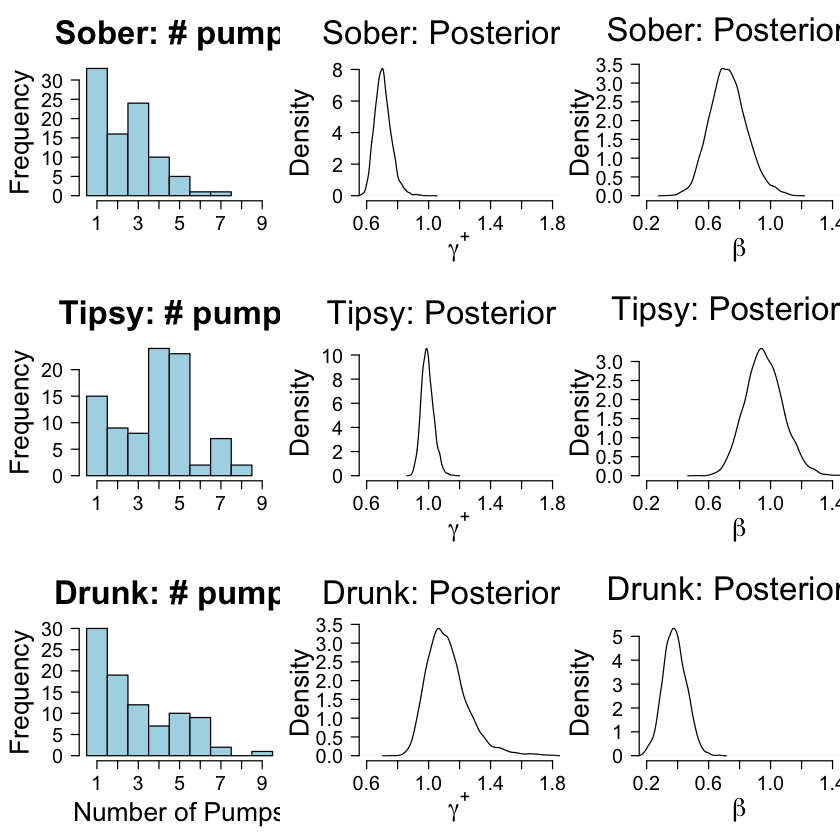

In [35]:
#################### PLOT SOME RESULTS
par (cex.main = 2.5, cex.lab = 2, cex.axis = 1.5, mar = c(5, 5, 4, 0), las = 1)
layout (matrix (1:9, 3, 3, byrow = T))

hist(npumps[1,], xlab=" ", main = "Sober: # pumps", breaks=c(0:max(npumps[1,])), xlim = range(c(0:9)), col="lightblue", axes=F)
axis(2)
axis(1, at=seq(.5,8.5,by=1), labels = c("1", "2", "3", "4", "5", "6", "7", "8", "9"))

plot(density(gplus.sober), xlab = expression (gamma^'+'),
	main = expression (paste ("Sober: Posterior ", gamma^'+')), xlim = c(0.6,1.8), bty = 'n')
plot (density(beta.sober), xlab = expression (beta),
	main = expression (paste ("Sober: Posterior ", beta)), xlim = c(0.2,1.4), bty = 'n')

hist(npumps[2,], xlab=" ", main = "Tipsy: # pumps", breaks=c(0:max(npumps[2,])), xlim = range(c(0:9)), col="lightblue", axes=F)
axis(2)
axis(1, at=seq(.5,8.5,by=1), labels = c("1", "2", "3", "4", "5", "6", "7", "8", "9"))
plot(density (gplus.tipsy), xlab = expression (gamma^'+'),
	main = expression (paste ("Tipsy: Posterior ", gamma^'+')), xlim = c(0.6,1.8), bty = 'n')
plot(density (beta.tipsy), xlab = expression (beta),
	main = expression (paste ("Tipsy: Posterior ", beta)), xlim = c(0.2,1.4), bty = 'n')

hist(npumps[3,], xlab="Number of Pumps", main = "Drunk: # pumps", breaks=c(0:max(npumps[3,])), xlim = range(c(0:9)), col="lightblue", axes=F)
axis(2)
axis(1, at=seq(.5,8.5,by=1), labels = c("1", "2", "3", "4", "5", "6", "7", "8", "9"))
plot(density(gplus.drunk), xlab = expression (gamma^'+'),
	main = expression(paste ("Drunk: Posterior ", gamma^'+')), xlim = c(0.6,1.8), bty = 'n')
plot(density(beta.drunk), xlab = expression (beta),
	main = expression(paste ("Drunk: Posterior ", beta)), xlim = c(0.2,1.4), bty = 'n')


<img src="figures/cap16.5.png" width=600 />

### Stan code


TRANSLATING MODEL 'model' FROM Stan CODE TO C++ CODE NOW.
COMPILING THE C++ CODE FOR MODEL 'model' NOW.
In file included from file2bee265871.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/model/model_header.hpp:17:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/agrad/rev.hpp:5:
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/agrad/rev/chainable.hpp:87:17: warning: 'static' function 'set_zero_all_adjoints' declared in header file should be declared 'static inline' [-Wunneeded-internal-declaration]
    static void set_zero_all_adjoints() {
                ^
In file included from file2bee265871.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/include//stansrc/stan/model/model_header.hpp:21:
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/rstan/in

ERROR: Error in eval(expr, envir, enclos): 함수 "windows"를 찾을 수 없습니다


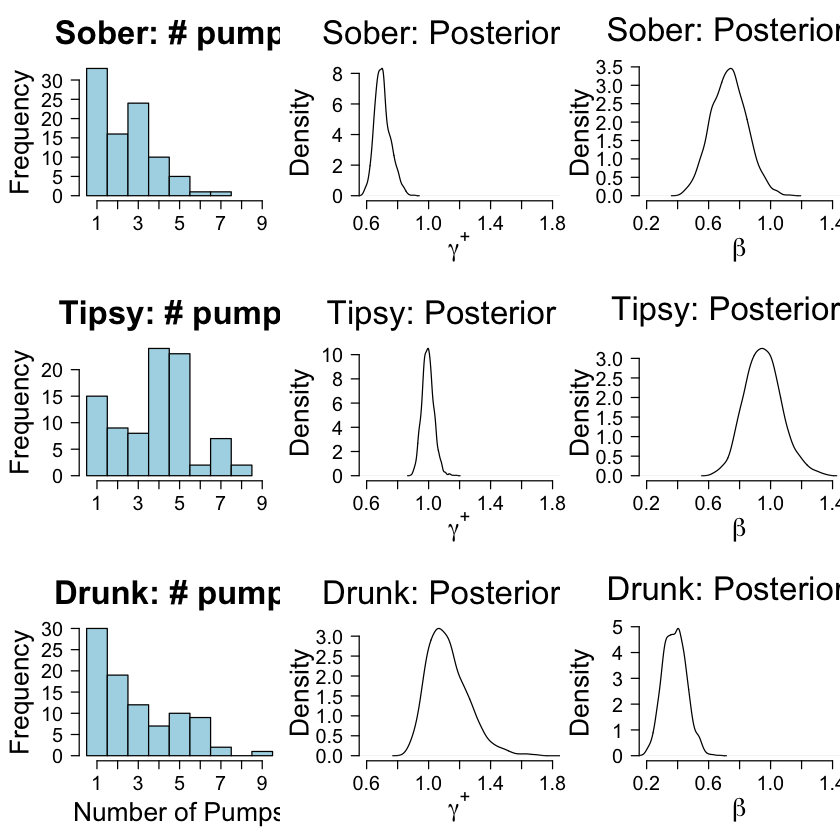

In [36]:
library(rstan)

model <- "
// BART Model of Risky Decision-Making
data {
  int<lower=1> nconds;
  int<lower=1> ntrials;
  real<lower=0,upper=1> p;
  int<lower=1> options[nconds,ntrials];
  int d[nconds,ntrials,30];
}
parameters {
  vector<lower=0>[nconds] gplus;
  vector<lower=0>[nconds] beta;
  
  // Priors
  real<lower=0,upper=10> mug;
  real<lower=0,upper=10> sigmag;
  real<lower=0,upper=10> mub;
  real<lower=0,upper=10> sigmab;
} 
transformed parameters {
  vector<lower=0>[nconds] omega;

  // Optimal Number of Pumps
  omega <- -gplus / log1m(p);
}
model {
  for (i in 1:nconds) {
    gplus[i] ~ normal(mug, sigmag)T[0,];
    beta[i] ~ normal(mub, sigmab)T[0,];
  }
  // Choice Data
  for (i in 1:nconds) {
    for (j in 1:ntrials) {
      for (k in 1:options[i,j]) {
        real theta;
        theta <- 1 - inv_logit(-beta[i] * (k - omega[i]));
        d[i,j,k] ~ bernoulli(theta);
      }
    }
  }
}"

p       <- .15  # (Belief of) bursting probability
ntrials <- 90  # Number of trials for the BART

################### READ IN THE DATA

Data <- list(
  matrix(data=as.numeric(as.matrix(read.table("GeorgeSober.txt"))[-1, ]),
         ntrials, 8),
  matrix(data=as.numeric(as.matrix(read.table("GeorgeTipsy.txt"))[-1, ]),
         ntrials, 8),
  matrix(data=as.numeric(as.matrix(read.table("GeorgeDrunk.txt"))[-1, ]),
         ntrials, 8)
)

nconds <- length(Data)                         
cash   <- npumps <- matrix (, nconds, ntrials)  # Cashes and nr. of pumps
d      <- array (-99, c(nconds, ntrials, 30))      # Data in binary format

for (i in 1:nconds) {
  cash[i, ]   <- (Data[[i]][, 7] != 0) * 1  # Cash or burst?
  npumps[i, ] <- Data[[i]][, 6]             # Nr. of pumps

  for (j in 1:ntrials) {
    if (npumps[i, j] > 0) {d[i, j, 1:npumps[i, j]] <- rep(0, npumps[i, j])}
    if (cash[i, j] == 1) {d[i, j, (npumps[i, j] + 1)] <- 1}
  }
}
options <- cash + npumps  # Nr. of decision possibilities

# To be passed on to Stan:
data <- list(nconds=nconds, ntrials=ntrials, p=p, options=options, d=d) 

myinits <- list(
  list(gplus=rep(1.2, 3), beta=rep(.5, 3), mug=1.2, sigmag=.1, mub=.8, sigmab=.8),
  list(gplus=rep(1.2, 3), beta=rep(.5, 3), mug=1.5, sigmag=.2, mub=1, sigmab=1.2))

# Parameters to be monitored:
parameters <- c("beta", "gplus", "mub", "mug", "sigmab", "sigmag")  

# The following command calls Stan with specific options.
# For a detailed description type "?rstan".
samples <- stan(model_code=model,   
                data=data, 
                init=myinits,  # If not specified, gives random inits
                pars=parameters,
                iter=1500, 
                chains=2, 
                thin=1,
                warmup=500,  # Stands for burn-in; Default = iter/2
                seed=1234  # Setting seed; Default is random seed
)
# Now the values for the monitored parameters are in the "samples" object, 
# ready for inspection.

gplus.sober <- extract(samples)$gplus[,1]
gplus.tipsy <- extract(samples)$gplus[,2]
gplus.drunk <- extract(samples)$gplus[,3]

beta.sober  <- extract(samples)$beta[,1]
beta.tipsy  <- extract(samples)$beta[,2]
beta.drunk  <- extract(samples)$beta[,3]

#################### PLOT SOME RESULTS
windows()
par (cex.main = 2.5, cex.lab = 2, cex.axis = 1.5, mar = c(5, 5, 4, 0), las = 1)
layout (matrix (1:9, 3, 3, byrow = T))

hist(npumps[1,], xlab=" ", main = "Sober: # pumps", breaks=c(0:max(npumps[1,])),
     xlim = range(c(0:9)), col="lightblue", axes=F)
axis(2)
axis(1, at=seq(.5,8.5,by=1), 
     labels = c("1", "2", "3", "4", "5", "6", "7", "8", "9"))

plot(density(gplus.sober), xlab = expression (gamma^'+'), xlim = c(0.6,1.8), 
     main = expression (paste ("Sober: Posterior ", gamma^'+')), bty = 'n')
plot (density(beta.sober), xlab = expression (beta), bty = 'n',
      main = expression (paste ("Sober: Posterior ", beta)), xlim = c(0.2,1.4))

hist(npumps[2,], xlab=" ", main = "Tipsy: # pumps", breaks=c(0:max(npumps[2,])),
     xlim = range(c(0:9)), col="lightblue", axes=F)
axis(2)
axis(1, at=seq(.5,8.5,by=1), 
     labels = c("1", "2", "3", "4", "5", "6", "7", "8", "9"))
plot(density (gplus.tipsy), xlab = expression (gamma^'+'), xlim = c(0.6,1.8),
     main = expression (paste ("Tipsy: Posterior ", gamma^'+')), bty = 'n')
plot(density (beta.tipsy), xlab = expression (beta), xlim = c(0.2,1.4),
     main = expression (paste ("Tipsy: Posterior ", beta)), bty = 'n')

hist(npumps[3,], xlab="Number of Pumps", main = "Drunk: # pumps",
     breaks=c(0:max(npumps[3,])), xlim = range(c(0:9)), col="lightblue", axes=F)
axis(2)
axis(1, at=seq(.5,8.5,by=1), 
     labels = c("1", "2", "3", "4", "5", "6", "7", "8", "9"))
plot(density(gplus.drunk), xlab = expression (gamma^'+'), xlim = c(0.6,1.8),
     main = expression(paste ("Drunk: Posterior ", gamma^'+')),  bty = 'n')
plot(density(beta.drunk), xlab = expression (beta), xlim = c(0.2,1.4),
     main = expression(paste ("Drunk: Posterior ", beta)),  bty = 'n')



# 참고자료

* [1] Bayesian Cognitive Modeling: A Practical Course - http://www.amazon.com/Bayesian-Cognitive-Modeling-Practical-Course/dp/1107603579/
* [2] codes(winbugs, jags) - http://bayesmodels.com/
* [3] codes(stan) - https://github.com/stan-dev/example-models/tree/master/Bayesian_Cognitive_Modeling
* [4] Balloon Analog Risk Task (BART)- Joggle Research for iPad - https://www.youtube.com/watch?v=foy3ZVokjFM
* [5] Balloon Analog Risk Task (BART) online demo - http://timo.gnambs.at/de/scripts/bart